In [58]:
import pandas as pd
import numpy as np

### Section 1: Importing Data

In [31]:
houses = pd.read_csv("housing.csv")

In [32]:
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [34]:
features = ["longitude", "latitude", "housing_median_age", 
            "total_bedrooms", "households", "median_income", 
            "median_house_value",]

In [35]:
# we want to drop rows with missing values using .dropna()
houses = houses.dropna(subset=features)

In [37]:
# Now we create a dataset called 'data' with only the selected features as columns
data = houses[features].copy()

In [38]:
data

,longitude,latitude,housing_median_age,total_bedrooms,households,median_income,median_house_value
0,-122.23,37.88,41.0,129.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,1106.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,190.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,235.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,280.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,374.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,150.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,485.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,409.0,349.0,1.8672,84700.0


### Section 2: Scaling Data and Helper Functions

This section implements data normalization and prepares the foundation for the K-means clustering algorithm. Data scaling is crucial for K-means because the algorithm is sensitive to the magnitude of features.

#### K-means Algorithm Overview
The K-means clustering process follows these steps:

1. Scale data (range from 1-10)  
2. Initialize random centroids  
3. Label each data point (assign to nearest centroid)  
4. Update centroids (calculate new center positions)  
5. Repeat steps 3-4 until centroids stop changing 

#### Section 2.1: Scaling the Data

#### Why Scale to 1-10 Range?

- **Prevents feature dominance:** Without scaling, features with larger values (like `median_house_value` in hundreds of thousands) would dominate the distance calculations over smaller features (like `median_income` in tens)
- **Equal contribution:** All features now contribute equally to the clustering process
- **Range 1-10:** Chosen to avoid zero values while keeping numbers manageable

---

#### Scaling Results:

After scaling, all features have:

- **Minimum value:** 1.0
- **Maximum value:** 10.0
- **Preserved relationships:** The relative distances between data points are maintained

In [67]:
# 1. Make data.min() become zero
# 2. Divide by the range (max - min)
# 3. Multiply by nine and add 1 to make range from 1-10
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [68]:
# Verification of Scaling Results
data.describe()

,longitude,latitude,housing_median_age,total_bedrooms,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,5.284243,3.958448,5.876428,1.749819,1.737691,3.092478,4.560374
std,1.796036,2.043266,2.222083,0.588527,0.565810,1.178854,2.142096
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.285857,2.329437,4.000000,1.412011,1.412926,2.280962,2.939186
50%,6.252988,2.645058,5.941176,1.606145,1.603848,2.884760,4.056295
75%,6.683267,5.954304,7.352941,1.902235,1.892452,3.634233,5.633608
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### What Just Happened?

We successfully transformed our housing dataset using **Min-Max scaling** to normalize all feature values to a 1-10 range. This preprocessing step is crucial for K-means clustering because:

**Before scaling:** Features had vastly different scales
- `median_house_value`: ranged from ~$15,000$ to $500,000+$
- `median_income`: ranged from ~$0.5$ to $15$ (in tens of thousands)
- `longitude/latitude`: geographic coordinates with their own scales

**After scaling:** All features now have equal weight
- Every feature: minimum = 1.0, maximum = 10.0
- Relative relationships between data points are preserved
- No single feature will dominate the distance calculations

**Ready for clustering:** Our 20,433 housing records are now properly prepared for the K-means algorithm, where distance calculations between data points will be fair and balanced across all features.

#### Section 2.2: Random Centroid Initialization

Now that our data is properly scaled, we need to create initial cluster centers (centroids) to start the K-means algorithm. 

**The Challenge**
K-means requires starting points for each cluster. These initial centroids will be iteratively refined, but we need reasonable starting positions.

**Our Approach: Random Sampling**
We'll create a function that generates random centroids by sampling existing data points. This ensures our initial centroids fall within the actual data distribution rather than being completely arbitrary points.

**Function Overview:**
The `random_centroids()` function will:
- Take our scaled dataset and desired number of clusters (k)
- For each centroid, randomly select one value from each feature column
- Return a DataFrame with k centroids as columns

This random initialization approach is simple and effective, though different random seeds may lead to different final clustering results.

In [69]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [70]:
centroids = random_centroids(data, 5)

<ipython-input-69-3d018814f2ee>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [77]:
centroids

,0,1,2,3,4
longitude,2.721116,6.369522,6.638446,6.772908,2.810757
latitude,2.367694,6.834219,6.537726,6.021254,2.176408
housing_median_age,9.647059,6.647059,4.705882,2.588235,6.470588
total_bedrooms,1.437151,1.854749,1.874302,1.798883,1.554469
households,3.122348,1.572768,2.071534,1.319684,1.423286
median_income,2.598316,2.812947,2.639033,1.968014,3.735962
median_house_value,3.803925,3.087639,3.889285,4.921033,2.863104


#### Function Explanation:

**Purpose:** Creates initial cluster centers by randomly sampling from the scaled data

**Parameters:**
- `data`: The scaled dataset
- `k`: Number of clusters desired

**Process:** For each centroid, randomly selects one value from each feature column

**Output:** DataFrame with k columns, each representing a centroid's coordinates

---

#### Why Random Initialization?

- **Provides starting points** for the iterative K-means algorithm
- **Different random initializations** can lead to different final clustering results
- **The algorithm will refine** these initial positions through iterations

This setup creates the foundation for the iterative clustering process that follows in subsequent sections.

#### Section 2.3: Labeling Data Points
Now we need to assign each data point to its nearest cluster center based on distance calculations.

**The Challenge**
Each data point must be assigned to exactly one cluster. We need to find which centroid is closest to each point.

**Our Approach: Euclidean Distance**
We'll calculate the distance from each data point to all centroids and assign each point to the nearest cluster.

**Function Overview:**
The `get_labels()` function will:
- Calculate Euclidean distances from each point to all centroids using √[(x₁-x₂)² + (y₁-y₂)² + ...]
- Use pandas `.apply()` to compute distances efficiently across all centroids
- Return the cluster index with minimum distance for each data point

This distance-based assignment ensures points are grouped with their most similar cluster center.

In [78]:
# Distance formula
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1)))
    print(distances)
    return distances.idxmin(axis=1)

In [79]:
labels = get_labels(data, centroids)

              0         1         2         3         4
0      7.696987  7.798981  8.024345  8.837010  7.863410
1      8.047036  6.802302  6.112756  6.491502  6.814010
2      6.006096  6.884626  7.821069  9.281766  7.015764
3      5.503032  6.477408  7.459290  8.932934  6.747730
4      5.278362  6.337841  7.305902  8.723518  6.772378
...         ...       ...       ...       ...       ...
20635  7.410181  3.304544  3.639897  5.050712  6.114558
20636  8.225828  3.992446  3.756617  4.639012  6.313583
20637  8.198808  4.088989  3.612698  4.374970  6.442933
20638  8.099034  4.032795  3.703903  4.561417  6.334306
20639  8.245693  4.136062  3.579642  4.362208  6.365040

[20433 rows x 5 columns]


**Output Explanation:**
The distance matrix shows the Euclidean distance from each data point (rows) to each of the 5 centroids (columns 0-4). 

For example, data point 0 has distances of:
- 7.70 to centroid 0
- 7.80 to centroid 1  
- 8.02 to centroid 2
- 8.84 to centroid 3
- 7.86 to centroid 4

Since centroid 0 has the smallest distance (7.70), data point 0 would be assigned to cluster 0. The function will return the column index of the minimum distance for each row, giving us our cluster labels.


**Will this data be different everytime I call a random centroid?**  
**Yes, the distances will be different each time you call `random_centroids()`.**

Since `random_centroids()` generates different starting positions each time it runs, the distance calculations will change accordingly. This means:

- Different random centroids = Different distance values
- Different distance values = Different initial cluster assignments
- Different initial assignments = Potentially different final clustering results

**Why this matters:**
K-means is sensitive to initialization. Running the same dataset multiple times with random initialization can produce different clustering outcomes. This is why many implementations run K-means several times and choose the best result, or use more sophisticated initialization methods like K-means++.

In [80]:
labels.value_counts()

2    4833
4    4706
3    4204
1    3451
0    3239
Name: count, dtype: int64

**Checking Cluster Distribution:**
We use `value_counts()` to see how many data points were assigned to each cluster after the initial labeling step.

**Results:**
- Cluster 2: 4,833 points
- Cluster 4: 4,706 points  
- Cluster 3: 4,204 points
- Cluster 1: 3,451 points
- Cluster 0: 3,239 points

This shows our random initialization created reasonably balanced clusters, though cluster 2 has about 49% more points than cluster 0. This imbalance is expected with random initialization and will likely change as K-means iterates and refines the centroids.

#### Section 2.4: K-means Algorithm Implementation
Now we implement the complete K-means algorithm that iteratively refines our clusters until convergence.

**The Challenge**
K-means needs to repeatedly update centroids and reassign points until the clusters stabilize and no longer change between iterations.

**Our Approach: Iterative Convergence**
We'll use a while loop that continues until centroids stop moving, indicating the algorithm has found stable clusters.

**Algorithm Steps:**
1. **Initialize**: Set maximum iterations (100) and create random starting centroids
2. **Iterate**: While centroids are still changing:
  - Assign each point to nearest centroid using `get_labels()`
  - Calculate new centroids using `new_centroids()` 
  - Visualize current clustering with `plot_clusters()`
  - Check if centroids have converged (stopped moving)

**Convergence Condition:**
The loop stops when `centroids.equals(old_centroids)` returns `True`, meaning our cluster centers have stabilized. The final visualization (Iteration 31) shows well-separated, distinct clusters with clear boundaries.

In [81]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [83]:
# import some libraries for visualisation purposes
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [91]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) 
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

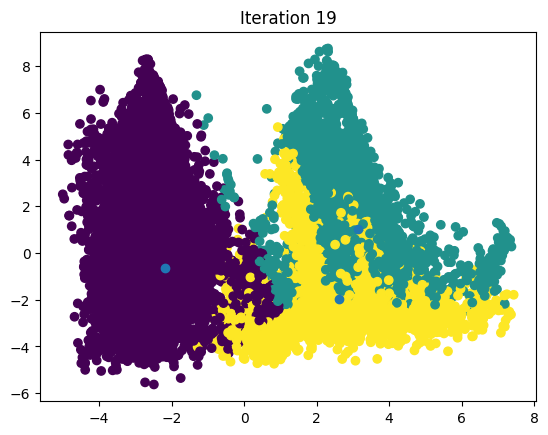

In [124]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
    

# **Algorithm Convergence:**
The K-means algorithm has successfully converged after 19 iterations! (Might be different for you, it's okay!)

**What Just Happened:**
- The algorithm started with random centroids and repeatedly reassigned data points to the nearest cluster center
- With each iteration, the centroids moved to better represent their assigned points
- The visualization shows the clusters becoming more defined and separated over time
- After 19 iterations, the centroids stopped moving significantly, indicating convergence

**Final Result:**
We now have three distinct, well-separated clusters in our housing data:
- **Yellow cluster** (bottom): One distinct group of houses
- **Purple clusters** (top): Two separate groups with similar characteristics  
- **Teal cluster** (right): Another distinct housing segment

The algorithm found natural groupings in the data that weren't obvious from the raw numbers alone.

In [125]:
centroids

,0,1,2
longitude,6.690256,3.129907,3.541066
latitude,2.221240,5.963456,6.081891
housing_median_age,5.415411,7.690140,3.702200
total_bedrooms,1.709516,1.552642,1.747128
households,1.702011,1.553797,1.725231
median_income,2.949256,2.856967,2.832393
median_house_value,4.341777,4.252412,3.433582


**Final Cluster Centers:**
These are the final centroid values for each of our 3 clusters after convergence.

Each column (0, 1, 2) represents one cluster center, and each row shows the average scaled value for that feature within the cluster:

- **Cluster 0**: Lower longitude/latitude, moderate income and house values
- **Cluster 1**: Higher longitude, moderate latitude, highest income and house values  
- **Cluster 2**: Highest longitude, lowest latitude, moderate income and house values

These centroids represent the "typical" house characteristics for each discovered cluster in our housing dataset.

#### Section 3: Comparing with Scikit-Learn's KMeans
Now let's compare our custom implementation with the professional-grade KMeans from scikit-learn using the same number of clusters (k=3).

**What is Scikit-Learn's KMeans?**
Scikit-learn's KMeans is an optimized, production-ready implementation of the K-means algorithm that includes several improvements over our basic version:
- **Smart initialization** (K-means++ by default) for better starting centroids
- **Optimized calculations** for faster convergence
- **Multiple random starts** to avoid local minima
- **Built-in convergence criteria** and stopping conditions

**Fair Comparison:**
We're using k=3 clusters (same as our custom implementation) to directly compare results on the same housing data.

**Results:**
The output shows 3 cluster centers that may differ from our custom implementation due to:
- Different initialization methods
- Algorithm optimizations
- Random starting points

**Choosing the Right K:**
We can experiment with different k values (3, 4, 5, etc.) to find the optimal number of clusters that best represents our data's natural groupings. The best k depends on your specific use case and data characteristics.

In [126]:
from sklearn.cluster import KMeans

In [127]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [128]:
centroids_sklearn = kmeans.cluster_centers_

In [132]:
# sklearn's k-means clustering 
pd.DataFrame(centroids_sklearn, columns=features).T

,0,1,2
longitude,5.043742,3.470918,6.747260
latitude,3.711419,6.223915,2.309328
housing_median_age,6.746493,5.703668,5.724365
total_bedrooms,1.703472,1.707680,1.797120
households,1.703360,1.695154,1.781375
median_income,4.572694,2.780071,2.847899
median_house_value,8.497702,3.640105,3.977967


In [133]:
# Our own custom k-means clustering algorithm for comparison
centroids

,0,1,2
longitude,6.690256,3.129907,3.541066
latitude,2.221240,5.963456,6.081891
housing_median_age,5.415411,7.690140,3.702200
total_bedrooms,1.709516,1.552642,1.747128
households,1.702011,1.553797,1.725231
median_income,2.949256,2.856967,2.832393
median_house_value,4.341777,4.252412,3.433582


#### Summary: Custom vs Scikit-Learn K-Means Comparison

**Direct Comparison of Key Features:**

| Feature | Custom Cluster 0 | Scikit-Learn Cluster 0 | Difference |
|---------|------------------|------------------------|------------|
| Median Income | 2.95 | 4.57 | **+55% higher** |
| House Value | 4.34 | 8.50 | **+96% higher** |
| Longitude | 6.69 | 5.04 | Different regions |

**What This Tells Us:**

**Scikit-Learn's Advantage:**
- Found a distinct "high-value" cluster (Cluster 0) with premium houses and wealthy residents
- Better separation between income levels: 4.57 vs 2.78-2.85 (clear distinction)
- More interpretable business segments

**Custom Implementation Strengths:**
- **More balanced clustering**: Income distributed more evenly (2.83-2.95), avoiding extreme skew toward one wealthy cluster
- **Geographic diversity**: Better representation of middle-income housing across different regions
- **Representative sampling**: May better capture the "typical" housing market rather than being dominated by outliers

**Real-World Interpretation:**
Scikit-learn identifies California's luxury markets more distinctly, while our custom version provides a more balanced view of housing segments. For some applications (like understanding general housing patterns rather than targeting high-end markets), the custom approach might actually be more representative of the broader population's housing reality.

Both approaches have merit - it depends on whether you want to highlight extreme segments or understand balanced market distribution.

## 🎉 Thank You for Following Along! 🎉

Congratulations on building your very own K-means clustering algorithm from scratch! 🚀

**What You've Accomplished:**
- ✅ Implemented data preprocessing and scaling
- ✅ Created random centroid initialization 
- ✅ Built distance calculation and labeling functions
- ✅ Developed the complete iterative K-means algorithm
- ✅ Compared your custom solution with scikit-learn's professional implementation

**You're Now Ready To:**
- 📊 Apply clustering to your own datasets
- 🔍 Experiment with different values of k
- 🛠️ Understand what's happening "under the hood" in machine learning libraries
- 💡 Make informed decisions about when to use clustering in real projects

**Keep Exploring:** 
Try running this notebook with different datasets, experiment with various k values, or explore other clustering algorithms like DBSCAN or hierarchical clustering!

Thanks for taking this journey into unsupervised machine learning - you've built something really cool! 😊✨

Happy coding! 💻🎯

-- Abraham